In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
#Lendo os dados do csv
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
#criando cópias para não alterar o original
train = train_data.copy()
test = test_data.copy()

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#é preciso remover o Ticket já que ele não servirá de nada nessa base de dado
train = train.drop(['Ticket'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [7]:
#esse gráfico tem várias informações de cada coluna, sendo elas
#count: amostras não nulas
#mean: média
#std: desvio padrão
# as porcentagens são quantos por cento do total estão acima ou abaixo do valor dado

#de cara parece que tem um problema no limite superior
train.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


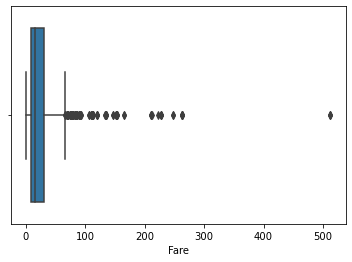

In [8]:
# Existe um problema na taxa por passageiro. Alguns valores estão altos demais e isso pode
# causar comportamentos indesejados no nosso algoritmo
sns.boxplot(x = train['Fare']);

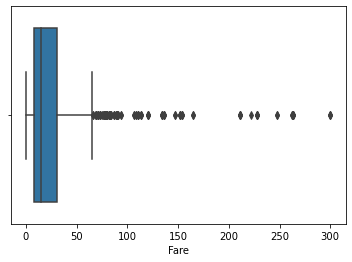

In [9]:
#vou remover o maior valor de 512.3292, tanto da base de teste quanto da base de treinamento
train['Fare'] = train['Fare'].replace(512.3292, 300)
test['Fare'] = test['Fare'].replace(512.3292, 300)


#veja o gráfico como ficou agora:
sns.boxplot(x = train['Fare']);

In [10]:
# Agora vou tratar os dados faltantes. Quais daados estão faltando?
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#na base de testes faltam um pouco menos, mas tem que tomar cuidado com isso pra não esquecer deles.
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#Muitas idades estão faltando. Vou substituir as faltantes pela média, tanto da base de treinamento quanto da base de teste
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())


In [13]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
#vou tratar os embarcados colocando como S todos aqueles que estiverem como nulo, já que S é o valor mais frequente.
train["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].fillna("S")

In [17]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
# Tem alguém com a taxa nula na base de testes
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
# nos dados de teste e de treinamento, a taxa de alguém está vazia
# Vou repor ela pela média da taxa da classe da qual ela pertence

test[["Pclass","Fare"]].groupby("Pclass").mean()

,Fare
Pclass,
1,92.295912
2,22.202104
3,12.459678


In [20]:
#a pessoa com taxa nula é da classe 3. Então vou repor o valor da taxa aqui por 12
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [21]:
test["Fare"] = test["Fare"].fillna(12)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
# podemos ver aqui que foi possível colocar o valor onde a taxa era nula
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [24]:
# agora é preciso tratar os dados da cabine tanto da base test quanto da train
# vou criar uma coluna chamada cabinBool para saber se uma pessoa tem uma cabine ou não
# e remover o campo da cabine. Não me faz diferença qual a Cabine da pessoa, apenas se ela tem ou não

train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [25]:
# agora todos os dados foram tratados
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBool      0
dtype: int64

In [26]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinBool      0
dtype: int64

In [28]:
# Agora é preciso fazer uma transformação nas variáveis em transformá-las em variáveis numéricas

# Vou mapear as letras de embarcadas como 1 2 e 3

embarked_mapping = {"S": 1, "C": 2, "Q": 3}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [29]:
# Checando para ver se deu certo

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,0


In [31]:
# Converter sexo para 0 ou 1

from sklearn import preprocessing

lbe = preprocessing.LabelEncoder()
train["Sex"] = lbe.fit_transform(train["Sex"])
test["Sex"] = lbe.fit_transform(test["Sex"])


In [32]:
# Como você pode ver aqui na variável nome tem sempre o título da pessoa( Senhor, senhora, senhorita, etc..)
# vou remover esse campo e colocá-lo em outra coluna, para as duas bases de dados
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0


In [33]:
train["Title"] = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
test["Title"] = test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0,Mr


In [36]:
#Para ser mais generalista, é melhor remover os títulos muito diferentes que representam basicamente a mesma classe social

train['Title'] = train['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')


test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [37]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0,Mr


In [38]:
train[["Title","PassengerId"]].groupby("Title").count()


,PassengerId
Title,
Master,40
Miss,185
Mr,517
Mrs,126
Rare,21
Royal,2


In [39]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000
